In [98]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
from scipy import stats

In [99]:
result = pd.read_excel(r"C:\Users\BROTHER COMPUTER\Desktop\GIT_Project\IOE_results\Data\ioeResult.xlsx")
# This is the syntax for reading the excel file using pandas
province = pd.read_excel(r"C:\Users\BROTHER COMPUTER\Desktop\GIT_Project\IOE_results\Data\district_province.xlsx")
result["District"] = result["District"].str.strip()
#this is for eliminating any kind of white spaces which can create a mess while configuring the data 
province['District'] = province['District'].str.strip()#same here

In [100]:
result = result.merge(province, on="District", how="left")
'''this is one of the crucial step as i wanted to have province in the ioeresult excel but hadnt initially and used this merge() method
of panda in order to attach province in the excel as a new column from another excel file....and this merge(0 function is a clever function 
as it recognize the districts by ownself and put the corresponding province which was in another excel'''
result.to_excel(r"C:\Users\BROTHER COMPUTER\Desktop\GIT_Project\IOE_results\Data\ioeResultss.xlsx",index = False)
#this is to convert the ready DataFrame into excel as it will help me to confirms results....
#otherwise here it has no need as i will be using dataframe only.

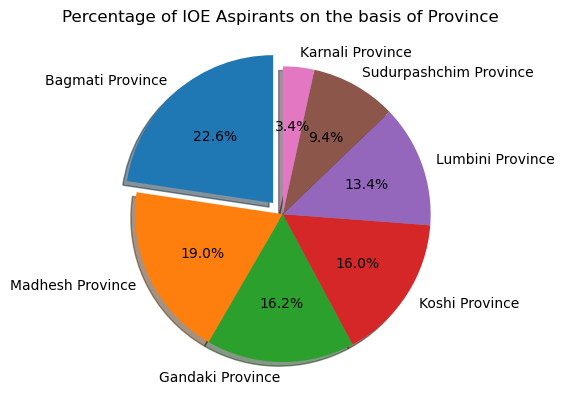

In [101]:
province_count= result["Province"].value_counts()
#this is method to count athe repeated headings in a column from a dataframe and it is beautiful that it stores both heading i.e index and count
plt.pie(province_count, labels =province_count.index, autopct= "%1.1f%%", startangle=90,explode=(0.1,0,0,0,0,0,0), shadow = True)
#i want to discover syntax related to piechart and this was the best time and used pie() method from matplotlib.pyplot module
'''Looking at the pie() firstly it takes x i.e list or arrays of value (here 'province_count)', 
then there is label as the pie should have name and i used the index of the province_count
another is  autopct i.e autopercentage which puts percentage in the pie to make comparison better and "%1.1f%%" here % is for formating and 
first 1 is for minimum width and is often ignored in pies and second .1 is for numbers of decimals and f is for indicating float points and 
two % is for making sure to use percentage sign'''
plt.title("Percentage of IOE Aspirants on the basis of Province ")
plt.show()



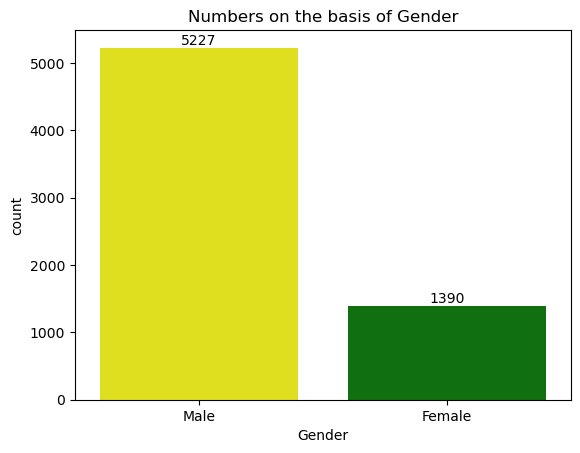

In [102]:
gender = result["Gender"].value_counts()
#here i want to have both index and count so used value_counts() 
colors= ['yellow','green']
bars = sb.barplot(x = gender.index , y = gender,hue =gender.index , palette= colors )
#here x and y has above value_counts index and numerical value and hue is for making the bars seperate as i wanted to color them different 
#for palette i need hue so hue is used 
for container in bars.containers:          # loop through all BarContainers
    bars.bar_label(container, fmt='%d')
#here for loop is required because of hue otherwise a simple bar_label() syntax would be in use 
#as hue seperates the basr...there will be number of container and each container contain a bar so to excess it we need to loop through the container
plt.title("Numbers on the basis of Gender")
plt.show()


In [103]:
count = result["District"].value_counts()
most_repeated = count.index[0]
times = count.iloc[0]
print(f"the most repeated District is {most_repeated} and that is about {times} times")
#this is a silly insight 

the most repeated District is Kathmandu and that is about 586 times


In [104]:
avg_rank = result.groupby('Province')['Rank'].mean()
for prov, ranks in avg_rank.items():
    print(f"The average rank of {prov} is {ranks}")
#this is for average ranks according to province which is also silly yet Quirky insight 


The average rank of Bagmati Province is 3337.9730123997083
The average rank of Gandaki Province is 2994.7798165137615
The average rank of Karnali Province is 3498.8653846153848
The average rank of Koshi Province is 3293.2665289256197
The average rank of Lumbini Province is 3086.3234567901236
The average rank of Madhesh Province is 3738.3854166666665
The average rank of Sudurpashchim Province is 3485.513181019332
